## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [216]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB



In [217]:
data = pd.read_csv('students-data-1.csv', sep = ';' )
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Inferences
- It is seen that the data has been read and columns have been read correctly 
- No corrective action needed to be taken at this stage

#### Checking for the data types of the different columns

In [218]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### Inferences
- It is seen that there are a lot of variables with object as data type. This might be because of the fact that they are all categorical variables. 
- The source of the data says that there should not be any null values 

#### Checking for the unique values of the variables
- Since there are a lot of categorical variables in this dataset, at this point it is good to see the unique values in each column

In [219]:
for x in data.columns:
    print('Unique values in',x, pd.unique(data[x]))


Unique values in school ['GP' 'MS']
Unique values in sex ['F' 'M']
Unique values in age [18 17 15 16 19 22 20 21]
Unique values in address ['U' 'R']
Unique values in famsize ['GT3' 'LE3']
Unique values in Pstatus ['A' 'T']
Unique values in Medu [4 1 3 2 0]
Unique values in Fedu [4 1 2 3 0]
Unique values in Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in Fjob ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in reason ['course' 'other' 'home' 'reputation']
Unique values in guardian ['mother' 'father' 'other']
Unique values in traveltime [2 1 3 4]
Unique values in studytime [2 3 1 4]
Unique values in failures [0 3 2 1]
Unique values in schoolsup ['yes' 'no']
Unique values in famsup ['no' 'yes']
Unique values in paid ['no' 'yes']
Unique values in activities ['no' 'yes']
Unique values in nursery ['yes' 'no']
Unique values in higher ['yes' 'no']
Unique values in internet ['no' 'yes']
Unique values in romantic ['no' 'yes']
Unique values in famrel [4 5 3 

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [220]:
data.index.name = 'number'

In [221]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Inferences
- Verified that the index name has been changed to 'number'

In [222]:
print('Number of missing values in each column')
data.isna().sum()

Number of missing values in each column


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Inferences
- This shows that there are no missing values in any of the column in the dataframe

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [223]:
print("Attribute names which are not numerical are:\n")
data.select_dtypes(include = 'number').columns

Attribute names which are not numerical are:



Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [224]:
des_data=data.describe().T

In [225]:
des_data

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


#### Method:
- Used the 'describe' function to get the Standard Deviation of all the columns
- Storing all the information of the describe in a new DataFrame
- Adding a new attribute to the describe DataFrame which contains the variance (square of standard deviation)

In [226]:
des_data['var'] = des_data['std']*des_data['std']
type(des_data['var']<1)

pandas.core.series.Series

In [227]:
des_data['var'] = des_data['std']*des_data['std']
low_var = des_data[des_data['var']<1].index.tolist()
low_var

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

#### Method (contd...)
- Identifies which are the attributes which variance less than 1
- Stored these attributes in a list called 'low_var'

In [228]:
data.drop(low_var, inplace = True, axis = 1)

#### Method (contd...)
- Dropped the attributes which are in low_var from the original dataframe

In [229]:
print('New shape of the data',data.shape)
data.head()

New shape of the data (395, 27)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [230]:
verification = data.describe().T
variance = verification['std']*verification['std']
variance

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
Name: std, dtype: float64

#### Inferences:
- Verified that all the correct columns have been dropped. 
- Another describe function is called and checked for variance < 1
- The above output shows all columns now have variance >1

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [231]:
cat_cols = data.select_dtypes(include = 'object').columns.tolist()

In [232]:
cat_cols

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

#### Method: 
- Determined all the categorical variables
- Now a loop is run over the contents of the lists containing the categorial attributes and encode them
- A dictionary stores the encoding classes for future use
- This dictionary is displayed

In [233]:

encoders = []

for z in cat_cols:
    le = preprocessing.LabelEncoder()
    data[z]=le.fit_transform(data[z])
    d = dict(zip(le.classes_, le.transform(le.classes_)))
    encoders.append(d.copy())

encoders


[{'GP': 0, 'MS': 1},
 {'F': 0, 'M': 1},
 {'R': 0, 'U': 1},
 {'GT3': 0, 'LE3': 1},
 {'A': 0, 'T': 1},
 {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4},
 {'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4},
 {'course': 0, 'home': 1, 'other': 2, 'reputation': 3},
 {'father': 0, 'mother': 1, 'other': 2},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1},
 {'no': 0, 'yes': 1}]

In [234]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


#### Inferences:
- Verified that all the categorical variables have been changed to numerical
- Labelencoding hasbeen successfull

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

#### Before changing G1, G2, G3 plotting pair plot to establish relationship between variables

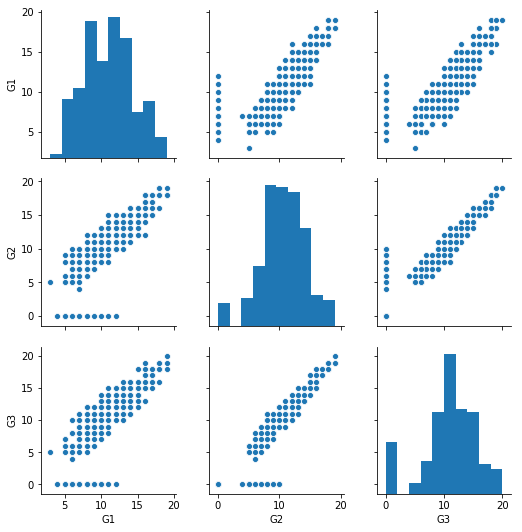

In [235]:
pair = data[['G1','G2', 'G3']]
sns.pairplot(pair);

#### Inferences from pairplot between the 3 grades
- It is seen that G3 holds string positive correlation with both G1 and G2
- They will make good attributes for classification 
- It is also seen that G1 and G2 are themselves well correlated (positively)
- This indicates that there may be redundancies when it comes to these two variables and both might not be included in the final feature set for classification

In [236]:
g_col = ['G1','G2', 'G3']
data[g_col] = (data[g_col] >= 10).astype(int)

In [237]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


#### Inferences
- Change is successfull 

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [238]:
X = data.drop('G3', axis = 1)
y = data['G3']

In [239]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [240]:
y.head(10)

number
0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    1
Name: G3, dtype: int64

#### Inferences
- Splitting into X and y data set is sucessfull

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

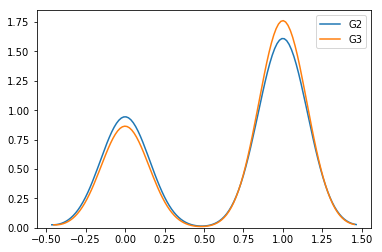

In [241]:
sns.kdeplot(X.G2)
sns.kdeplot(y)

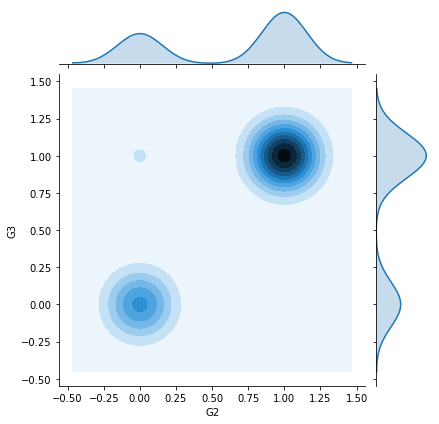

In [242]:
sns.jointplot(x='G2', y='G3', data=data, kind="kde");

#### Inferences:
- The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.
- The correlation is strong with this one combination

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

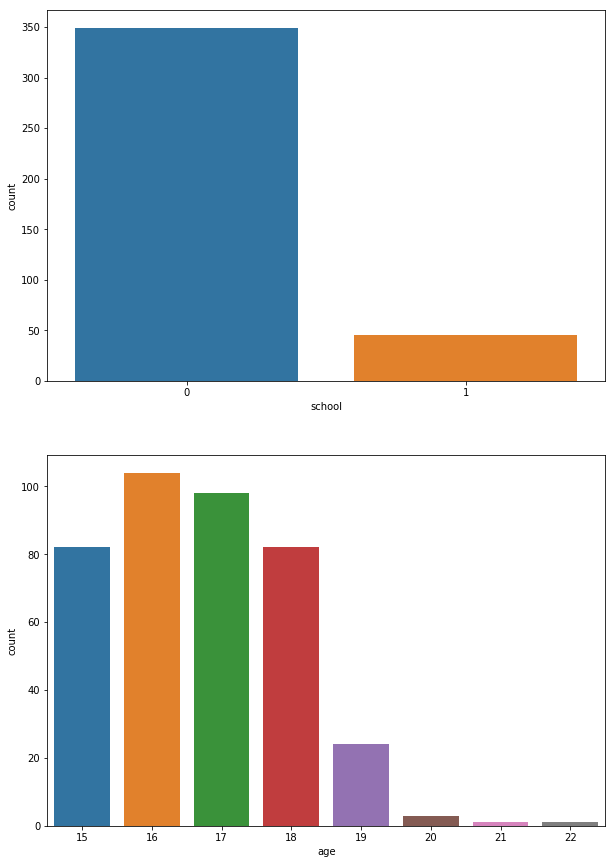

In [243]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10,15))
sns.countplot(data['school'], ax = axes[0]);
sns.countplot(data['age'], ax = axes[1]);
plt.show()

#### Inferences
Note: label encoding from dictionary executed above:
        {'GP': 0, 'MS': 1}
- Number of students in school 0 (GP) is significantly more than number of students in school 1 (MS). 
- Most students are between 15 and 18. The number of students over 18 years of age decrease progressively with every year of age
- Most students are of the age 16
- 17 has the second most number of students
- 18 has third most number of students
- The distributions of number of students as per age is positively skewed  22 being the maximum age of the students in the dataset



## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [244]:
split_frac = 300/X.shape[0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1-split_frac, random_state=1)
print('Number of train records',x_train.shape[0])
print('Number of test records',x_test.shape[0])
print('Number of features',x_train.shape[1])

Number of train records 300
Number of test records 95
Number of features 26


#### Inferences:
- Train and test sets have been created
- 300 training records and 95 testing records have been created as desired in the question 
- 26 attributes or features will be tested in the classification study

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

#### Methodology
- First all the features are used for building the model and the accuracy (and f1 score) is tested 
- Then a forward selection cross validation is run to select the best number of features (metrics used are accuracy and f1 score)
- Then using the best number of features is chosen with the best feature and then the final model is built and tested

In [245]:
#with all features
lr = LogisticRegression()
lr.fit(x_train,y_train)
predicted = lr.predict(x_test)
print('f1-score for the model with all the features is %1.3f'% f1_score(y_test, predicted))
print('Accuracy for the model with all the features is %1.3f'% lr.score(x_test, y_test))

f1-score for the model with all the features is 0.931
Accuracy for the model with all the features is 0.905


#### Inferences:
- We see that with all the features the f1 score and accuracy are 0.931 and 0.905 respoectively
- This is not a bad score but a test for feature importance is needed to build the most efficient model

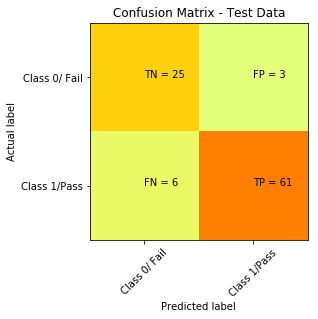

In [246]:
cm = confusion_matrix(y_test, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0/ Fail','Class 1/Pass']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Inferences
- We see that the model built has managed to predict correctly 86 times out of the 95 testing cases
- Of the actual pass cases of 67 the model has correctly predicted 61 of them and wrongly predicted (False Negatives) 6 of them
- This gives the model a recall score of 61/67 = 0.91
- The precision of the model is 61/64 = 0.95

#### Methodology
- Running feature selection (Forward selection) using 26 features to see the effect of adding more features to the study 

In [247]:
sfs1 = sfs(lr, k_features = 26, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(x_train.values, y_train.values)



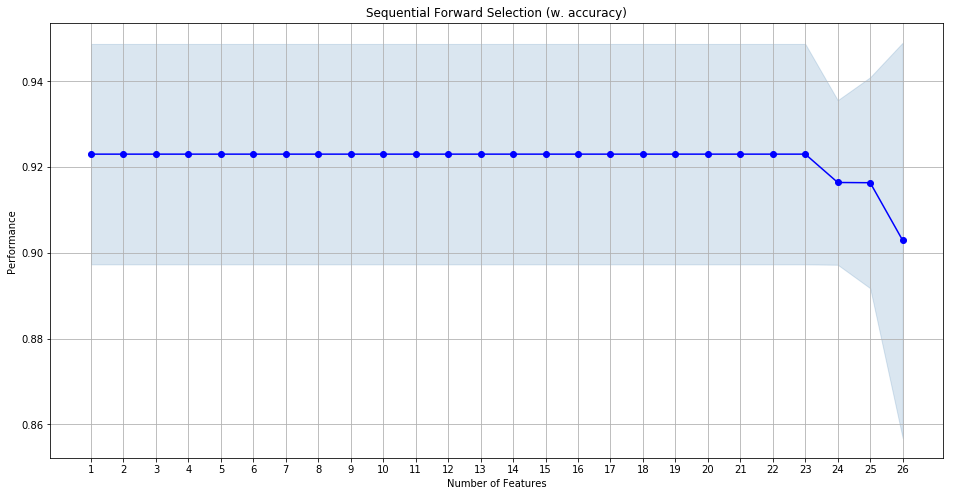

In [248]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. accuracy)')
plt.grid()
plt.show()

#### Inferences:
- We see that as we add more features to te model the accuracy does not change till 22 features and then the performance drops
- This means that 1 feature is good enough to give best and efficient model performance
- We proceed with only 1 feature 



In [249]:
sfs1 = sfs(lr, k_features = 1, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(x_train.values, y_train.values)
sfs1.get_metric_dict()

{1: {'feature_idx': (25,),
  'cv_scores': array([0.96721311, 0.91803279, 0.93333333, 0.89830508, 0.89830508]),
  'avg_score': 0.9230378808928407,
  'feature_names': ('25',),
  'ci_bound': 0.033049330991670435,
  'std_dev': 0.025713502305916774,
  'std_err': 0.012856751152958385}}

In [250]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[25]
['G2']


#### Inferences
- We see that feature 25 or G2 turns out to be the most important feature in this data set for the classification with G3 as the target variable
- This was also seen in the pair plot in the previous question 
- We now build the final model with G2 only 

In [251]:
lr.fit(x_train[subsetColumnList], y_train)
y_train_pred = lr.predict(x_train[subsetColumnList])
y_test_pred = lr.predict(x_test[subsetColumnList])
dat = [[lr.score(x_train[subsetColumnList], y_train), f1_score(y_train_pred, y_train)], [lr.score(x_test[subsetColumnList], y_test),f1_score(y_test_pred, y_test)]]
ind = ['Training', 'Testing']
cols = ['Accuracy', 'f1-Score']
df = pd.DataFrame(dat,index = ind, columns = cols)


#### The final accuracy and f1-score of the model is summarised in the DataFrame table below:

In [252]:
df.T

,Training,Testing
Accuracy,0.923333,0.905263
f1-Score,0.939948,0.931298


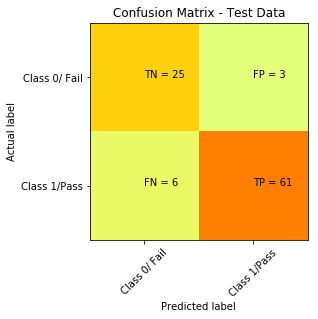

In [253]:
cm = confusion_matrix(y_test, y_test_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0/ Fail','Class 1/Pass']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

#### Inferences
- We see that the model built has managed to predict correctly 86 times out of the 95 testing cases
- Of the actual pass cases of 67 the model has correctly predicted 61 of them and wrongly predicted (False Negatives) 6 of them
- This gives the model a recall score of 61/67 = 0.91
- The precision of the model is 61/64 = 0.95
- This model with 1 variable gives better performace than the model with all variables

In [254]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

   micro avg       0.91      0.91      0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



### END OF THIS PART

# Naive bayes with Iris data

### Import Iris.csv

In [255]:
data_iris = pd.read_csv('iris.csv')

In [256]:
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Inferences:
- The data has been read correctly
- The columns have been correctly added 

In [257]:
data_iris.shape

(152, 6)

#### Inferences
- There are 152 observations and 6 features in the data set 

In [258]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Inferences:
- As per the above information, there are some 152 observation sets 
- However, some columns might have some missing values\

In [259]:
data_iris.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

#### Inferences:
- All the columns BUT for ID and Species have some missing values or the other

In [260]:
data_iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#### Inferences:
- The columns (except Species) are of numerical type
- Species is names (object type)

In [261]:
pd.unique(data_iris['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Inferences: 
- The Species column has 3 unique values - Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [262]:
le = preprocessing.LabelEncoder()
data_iris['Species']=le.fit_transform(data_iris['Species'])
data_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [263]:
d = dict(zip(le.classes_, le.transform(le.classes_)))
d

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

#### Inferences:
- The categorical column 'Species' have been correctly label encoded 
- Dictionary d contains the codes for the encoding

In [264]:
data_iris = data_iris.apply(lambda x:x.fillna(x.median()),axis = 0)
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


#### Inferences
- Null values have been removed from the data set
- Since we are dealing with numerical values and they seem to indicate sizes of features of plant parts used for identification, we have used median values of the respective rows to replace the missing values

In [265]:
data_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


#### Inferences:
- Sepal length seems to have mean and median very close to each other
- The max value is 7.9 for Sepal Length hence we can say that there might not be any higher outliers
- The minimum value of Sepal Length is 4.3 hence there might not be any low outliers either
- Sepal width seems to have mean and median very close to each other
- The max value is 4.4 for Sepal Length hence we can say that there might be some higher outliers
- Petal length has mean significantly lower than median - hence this data migt have lower outliers
- Petal width has mean slightly less than median - hence there is a possibility of lower outliers
- More information will be got after plotting box plot later

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [266]:
X = data_iris.drop('Species', axis = 1)
y = data_iris['Species']
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [267]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

#### Inferences
- Data has been split in to dependent (y) and independent (X) variables
- Verifed that the split has been done correctly

### Find the distribution of target variable (Class)

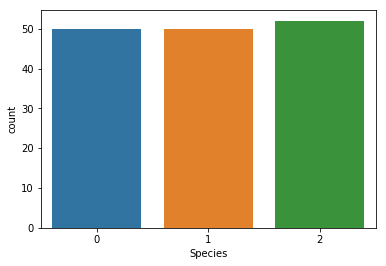

In [268]:
sns.countplot(y)

#### Inferences:
- It seems that the data is well distributed among the three class variables
- There seems to be very little bias between the three variables
- Species 2 ('Iris-virginica') has slightly higher number of data points in the data set as compared to te other two. This difference is small andshould not have any bearing on the solution. 

### Plot the distribution of target variable using histogram

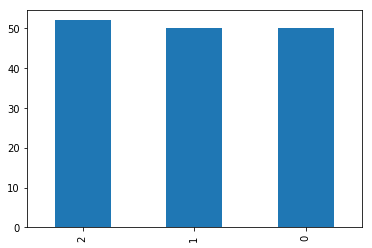

In [269]:
pd.value_counts(data_iris["Species"]).plot(kind="bar")

#### Inferences:
- It seems that the data is well distributed among the three class variables
- There seems to be very little bias between the three variables
- Species 2 ('Iris-virginica') has slightly higher number of data points in the data set as compared to te other two. This difference is small andshould not have any bearing on the solution. 

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

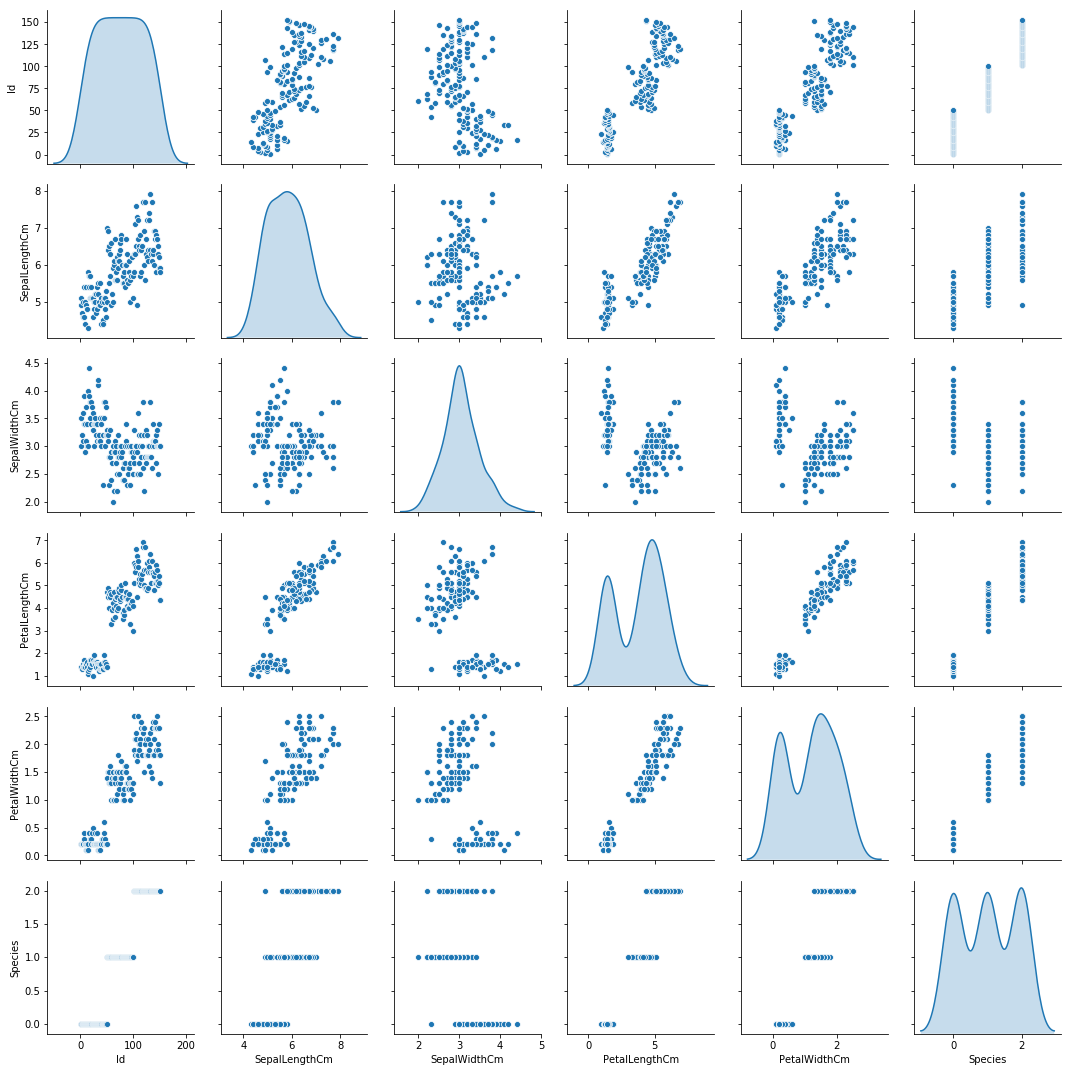

In [270]:
sns.pairplot(data_iris, diag_kind = 'kde')

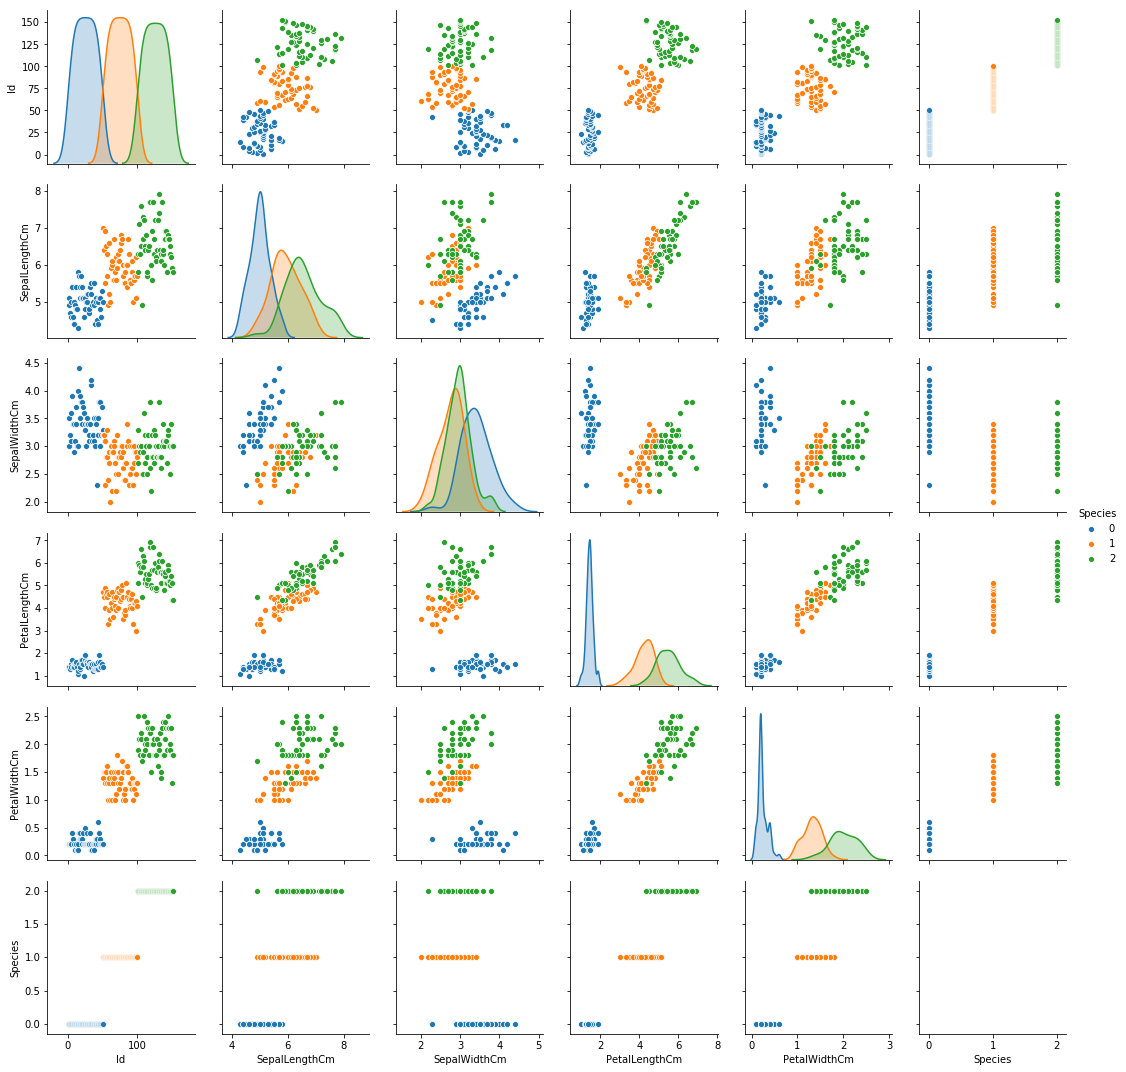

In [271]:
sns.pairplot(data_iris, hue = 'Species')

#### Inferences:
- There seems to be very nice separation between the variables with respoect to the three classes
- Petal Width and Petal Legth seem to have very good separation with respect to the three classes. This indicates that these might turn out to be very good variables for the classification. 
- Petal Length and Petal Width themselves are very linearly (positively) correlated with each other
- Petal Width seems to have slight positive correlation with Sepal Width and Sepal Length. This correlation exists in a very pronounced way fro classes 2 and 3 ('Iris-versicolor', 'Iris-virginica'respectively). For class 1 the correlation is poor


### Summary Statistics and explain insights for at least 2 variables

In [272]:
data_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5
Species,152.0,1.013158,0.821780,0.0,0.00,1.00,2.00,2.0


#### Inferences:
- Sepal length seems to have mean and median very close to each other
- The max value is 7.9 for Sepal Length hence we can say that there might not be any higher outliers
- The minimum value of Sepal Length is 4.3 hence there might not be any low outliers either
- Sepal width seems to have mean and median very close to each other
- The max value is 4.4 for Sepal Length hence we can say that there might be some higher outliers
- Petal length has mean significantly lower than median - hence this data migt have lower outliers
- Petal width has mean slightly less than median - hence there is a possibility of lower outliers
- More information will be got after plotting box plot later

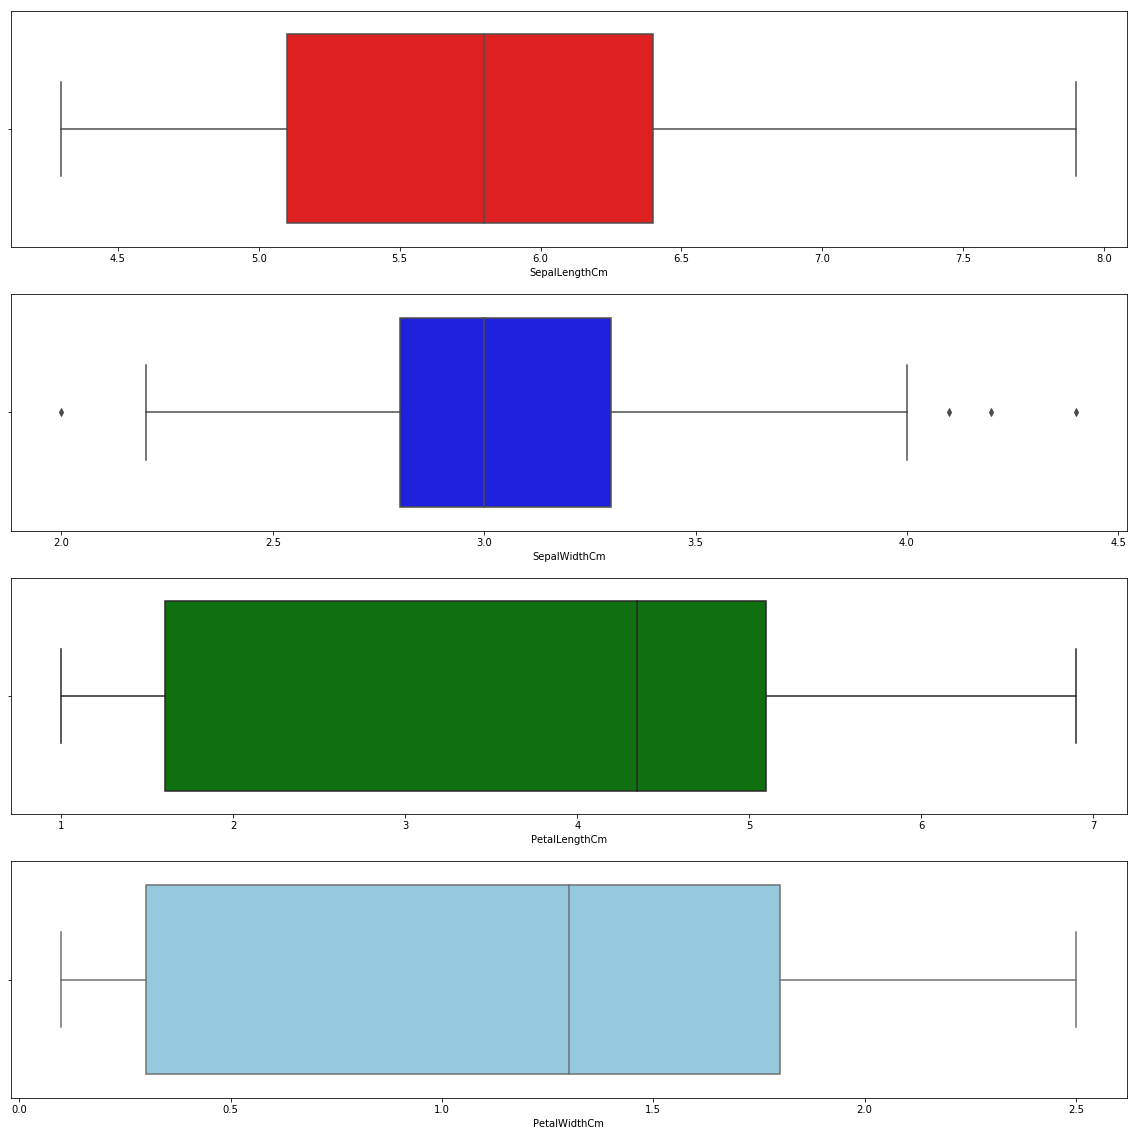

In [273]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (20,20))
sns.boxplot(data_iris['SepalLengthCm'], color ='r', ax = axes[0]);
sns.boxplot(data_iris['SepalWidthCm'], color = 'b', ax = axes[1]);
sns.boxplot(data_iris['PetalLengthCm'], color = 'g', ax = axes[2]);
sns.boxplot(data_iris['PetalWidthCm'], color = 'skyblue', ax = axes[3]);
plt.show()

#### Inferences:
- Sepal Length is slightly negatively skewed distribution
- There are no visible outliers in the distribution for Sepal Length
- Sepal Width is a positively skewed distribution 
- Sepal width has both high and low outliers. The high outliers outnumber the low outliers. 
- Petal Length is a heavily negatively skewed distribution
- There are no visible outliers from the box plot
- Petal Width (as expected from Petal Length) is also a negatively skewed distribution
- Again no visible outliers
- The observations match the observations made with respect to the descrive function

### Correlation among all variables and give your insights

In [274]:
data_iris.drop('Id', axis = 1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


#### Inferences
#### Point to Note: ID is just a number and does not have anything to do scientifically with the data. This has hence been removed

- Sepal Length and Sepal Width have weak negative correlation
- Sepal Length has strong positive correlation with Petal Length and Petal Width 
- Sepal width has weak to moderate negative correlation with Petal Length and Petal Width 
- Petal Length has very strong correlation with Petal width (seen earlier in pair plot also)
- Species has strong correlation with Petal Length and Petal Width (seen earlier in pair plot also). Seems to suggest they will be good in the Classification model. 


### Split data in Training and Validation in 80:20

In [275]:
X = X.drop('Id', axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [276]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Number of rows in training set',x_train.shape[0])
print('Number of rows in testing set', x_test.shape[0])


Number of rows in training set 121
Number of rows in testing set 31


#### Inferences:
- Train and Test data set has been split as per desired 80:20 ratio

### Do Feature Scaling

In [277]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [278]:
x_train_scaled[0:5]

array([[-0.97929353, -2.43755567, -0.11028397, -0.23408941],
       [-0.97929353,  0.33187378, -1.40804413, -1.27832236],
       [ 0.58777537, -0.36048358,  1.07462749,  0.81014354],
       [ 2.27538803,  1.7165885 ,  1.69529539,  1.33226001],
       [-0.25603096, -0.1296978 ,  0.45395958,  0.41855618]])

#### Inferences:
- Standard Scalar function has been used to scale the feature using the Z-score
- It has been verified that the scaling on the feature is successfull

### Train and Fit NaiveBayes Model

#### Methodology
- First all the features are used for building the model and the accuracy is tested 
- Then a forward selection cross validation is run to select the best number of features 
- Then using the best number of features is chosen with the best feature and then the final model is built and tested
- Gaussian Naive Bayes is used for this study

In [279]:
gnb = GaussianNB()

In [280]:
gnb.fit(x_train_scaled,y_train)
y_predict = gnb.predict(x_test_scaled)


In [281]:
y_predict

array([2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1,
       0, 1, 2, 1, 0, 2, 2, 1, 2])

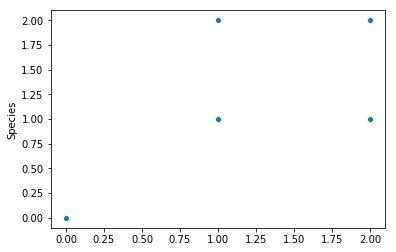

In [282]:
sns.scatterplot(x = y_predict, y = y_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [283]:
gnb.score(x_test_scaled,y_test)

0.9032258064516129

In [284]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  9]])

#### Inference from model using all features
- Accuracy of the model is 0.90
- It predicts 28 correct cases out of the 31 cases in the test data set 
- Recall for variable class 1 = 0.9
- Recall for variable class 0 = 1.0
- Recall for variable class 2 = 0.84

In [285]:
x_training_data = pd.DataFrame(x_train_scaled, columns=X.columns)
x_testing_data = pd.DataFrame(x_test_scaled, columns=X.columns)

In [286]:
x_training_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.979294,-2.437556,-0.110284,-0.234089
1,-0.979294,0.331874,-1.408044,-1.278322
2,0.587775,-0.360484,1.074627,0.810144
3,2.275388,1.716588,1.695295,1.332260
4,-0.256031,-0.129698,0.453960,0.418556


In [287]:
x_testing_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.587775,-1.283627,0.736081,0.940673
1,0.467232,0.793445,0.961779,1.462789
2,-0.497118,1.485803,-1.238771,-1.278322
3,1.069950,-1.283627,1.187476,0.810144
4,-0.979294,0.562660,-1.295195,-1.278322


#### Methodology
- Converted some non Dataframe data to Dataframe for ease of handling
- Forwards selection is used to select the features 
- Accuracy is used as the metric

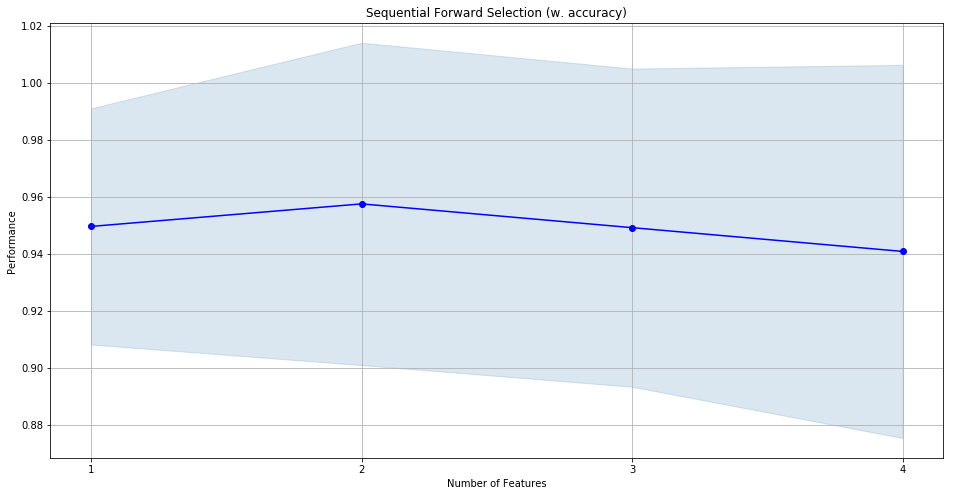

{1: {'feature_idx': (2,),
  'cv_scores': array([1.        , 0.92857143, 0.91666667, 1.        , 0.91666667,
         1.        , 0.91666667, 0.90909091, 0.90909091, 1.        ]),
  'avg_score': 0.9496753246753246,
  'feature_names': ('PetalLengthCm',),
  'ci_bound': 0.030747392509862394,
  'std_dev': 0.041398756387305564,
  'std_err': 0.013799585462435187},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([1.        , 1.        , 0.91666667, 0.83333333, 0.91666667,
         1.        , 1.        , 1.        , 0.90909091, 1.        ]),
  'avg_score': 0.9575757575757574,
  'feature_names': ('PetalLengthCm', 'PetalWidthCm'),
  'ci_bound': 0.041970160131872776,
  'std_dev': 0.056509261209004596,
  'std_err': 0.01883642040300153},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([1.        , 1.        , 0.91666667, 0.83333333, 0.91666667,
         1.        , 0.91666667, 1.        , 0.90909091, 1.        ]),
  'avg_score': 0.9492424242424242,
  'feature_names': ('SepalLengthCm', 'PetalLe

In [288]:
sfs1 = sfs(gnb, k_features = 4, forward = True, scoring = 'accuracy', cv = 10)
sfs1 = sfs1.fit(x_training_data, y_train)

fig = plot_sfs(sfs1.get_metric_dict(), figsize = (16,8))

plt.title('Sequential Forward Selection (w. accuracy)')
plt.grid()
plt.show()

sfs1.get_metric_dict()


In [289]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[0, 1, 2, 3]
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


#### Inferences:
- It is seen that only 2 features give the best feature set for this classification problem
- Adding more features to the classification problem reduces the accuracy
- We will hence go ahead with 2 features 
- Next step will be to find the 2 features and build the model based on those two features

In [290]:
sfs1 = sfs(gnb, k_features = 2, forward = True, scoring = 'accuracy', cv = 5)
sfs1 = sfs1.fit(x_training_data, y_train)



sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.96153846, 1.        , 0.95652174, 0.91304348, 0.95652174]),
  'avg_score': 0.9575250836120401,
  'feature_names': ('PetalLengthCm',),
  'ci_bound': 0.03543699894560176,
  'std_dev': 0.027571189091003295,
  'std_err': 0.013785594545501647},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([1.        , 0.88461538, 0.95652174, 0.95652174, 0.95652174]),
  'avg_score': 0.9508361204013378,
  'feature_names': ('PetalLengthCm', 'PetalWidthCm'),
  'ci_bound': 0.04774384933025612,
  'std_dev': 0.037146336794420934,
  'std_err': 0.018573168397210467}}

In [291]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[2, 3]
['PetalLengthCm', 'PetalWidthCm']


#### Inferences
- It is found that the best combination of features include 2 and 3 which are 'PetalLengthCm' and 'PetalWidthCm'

In [292]:
gnb.fit(x_training_data[subsetColumnList], y_train)

print('Training accuracy on selected features: %.3f' % gnb.score(x_training_data[subsetColumnList], y_train))


print('Testing accuracy on selected features: %.3f' % gnb.score(x_testing_data[subsetColumnList], y_test))


Training accuracy on selected features: 0.967
Testing accuracy on selected features: 0.935


In [293]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 8,  0,  0],
       [ 0, 11,  2],
       [ 0,  1,  9]])

#### Inference from model using all features
- Accuracy of the model is 0.90
- It predicts 28 correct cases out of the 31 cases in the test data set 
- Recall for variable class 1 = 0.9. This means that out of all the actual class 1, the model has been able to predict 90% of them (9/10)
- Recall for variable class 0 = 1.0. This means that out of all the cases with actual 0 class, the model has been success in predicting all of them
- Recall for variable class 2 = 0.84, This means that out of all the cases with class 2, the model has been able to successfully predict 84% of them (11/13)
- Precision for class 0 is 1.0. This means that all the times the model predicted class 0, the actaul class has been 0 100% of the times
- Precision for class 1 is 0.916. This means that all the times the model predicted class 1, the actual class has been 1 91.6% of the times (11/12)
- Precision for class 2 is 0.818. This means that all the times the model predicted class 2, the actual class has been 2 81.8% of the times (9/11)